# Gaussian Mixture Models

- 1) We begin by selecting the number of clusters and randomly initializing the Gaussian distribution parameters for each cluster;
- 2) Given these Gaussian distributions for each cluster, compute the probability that each data point belongs to a particular cluster;
- 3) Based on these probabilities, we compute a new set of parameters for the Gaussian distributions such that we maximize the probabilities of data points within the clusters;
- 4) Steps 2 and 3 are repeated iteratively until convergence, where the distributions don’t change much from iteration to iteration.

![](https://cdn-images-1.medium.com/max/1800/1*OyXgise21a23D5JCss8Tlg.gif)

Source: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

### Generating data

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=10)

In [3]:
points = data[0]
labels = data[1]

<IPython.core.display.Javascript object>


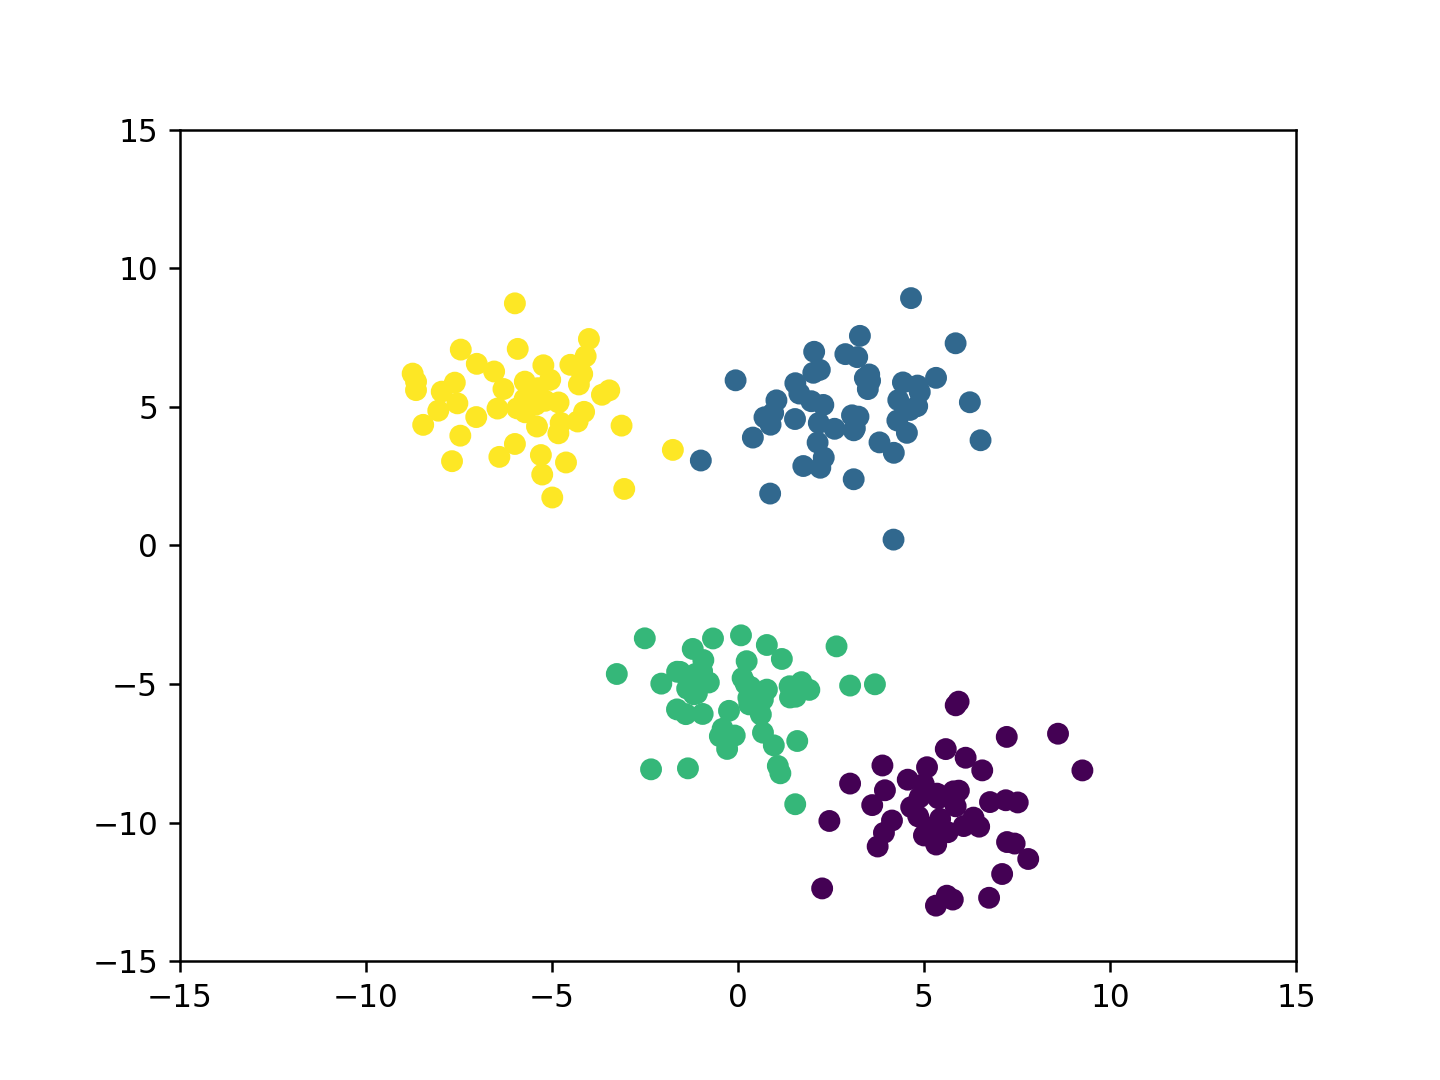

In [4]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=labels)
plt.axis([-15, 15, -15, 15])
plt.show()

### Applying GMM

In [5]:
gmm = GaussianMixture(n_components=4).fit(points)

In [6]:
predicted_labels = gmm.predict(points)
centers = gmm.means_

<IPython.core.display.Javascript object>


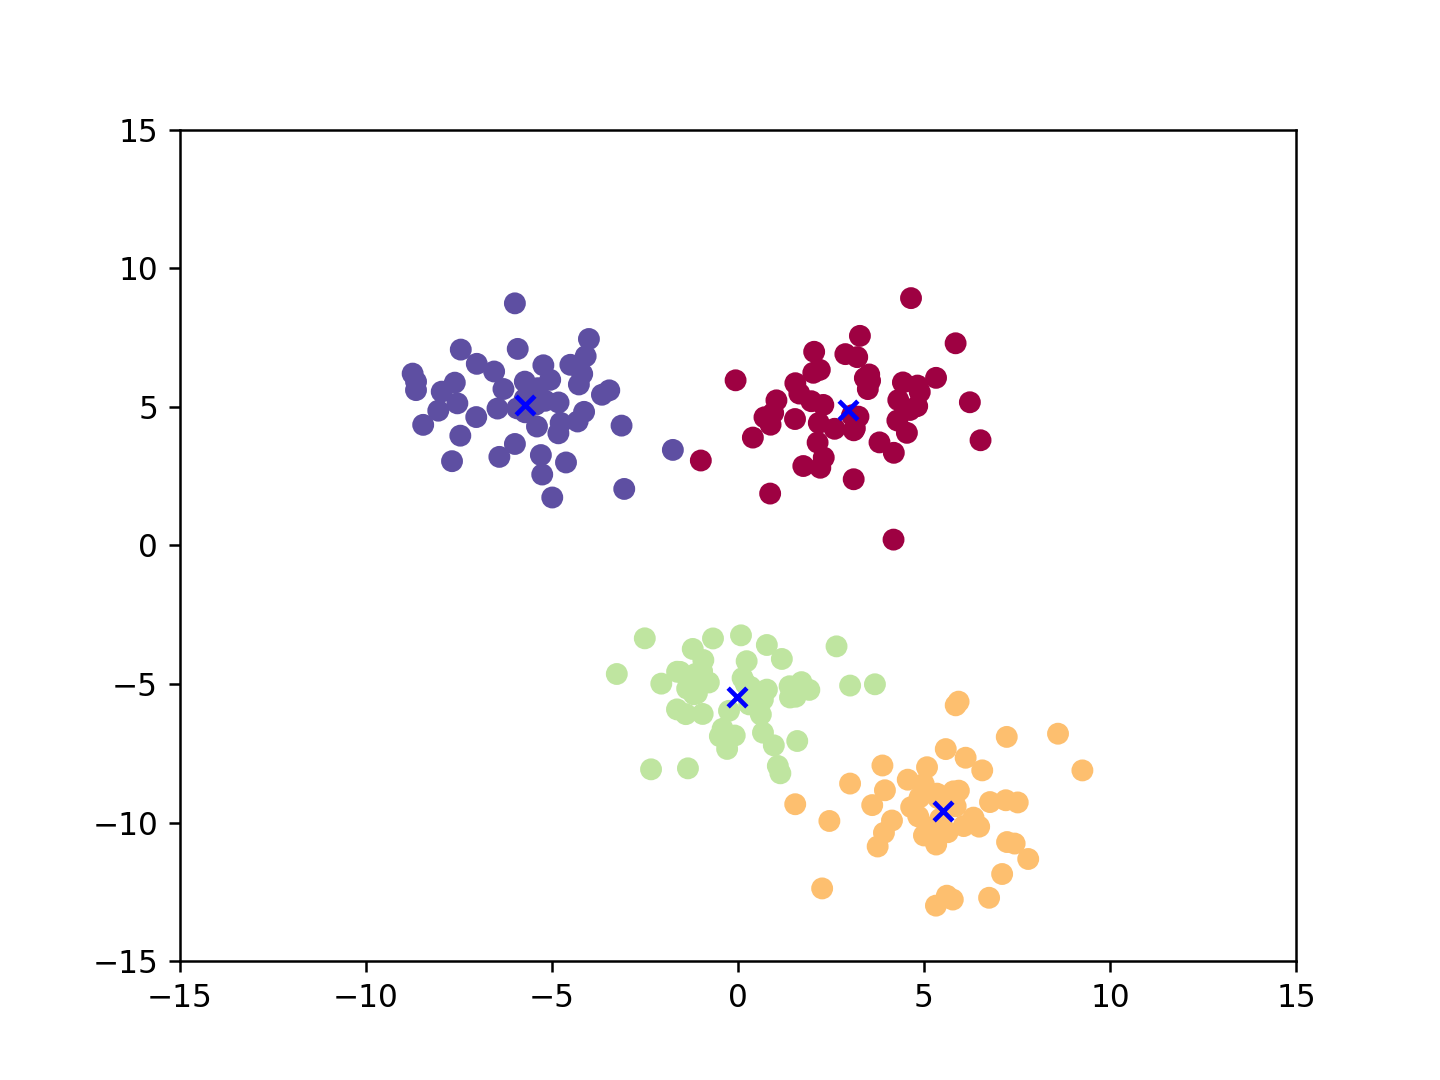

In [7]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
plt.axis([-15, 15, -15, 15])
plt.show()

### Comparing to K-Means

### Generate data

In [8]:
x1, y1 = np.random.multivariate_normal([0,1], [[1, 2], [0.7, 2]], 1000).T
x2, y2 = np.random.multivariate_normal([1,-2], [[2, 1], [-2, 1]], 1000).T

c:\users\bearch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.
c:\users\bearch\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


In [9]:
x = np.concatenate((x1,x2)).reshape((-1,1))
y = np.concatenate((y1,y2)).reshape((-1,1))

In [10]:
points = np.concatenate((x,y), axis=1)

<IPython.core.display.Javascript object>


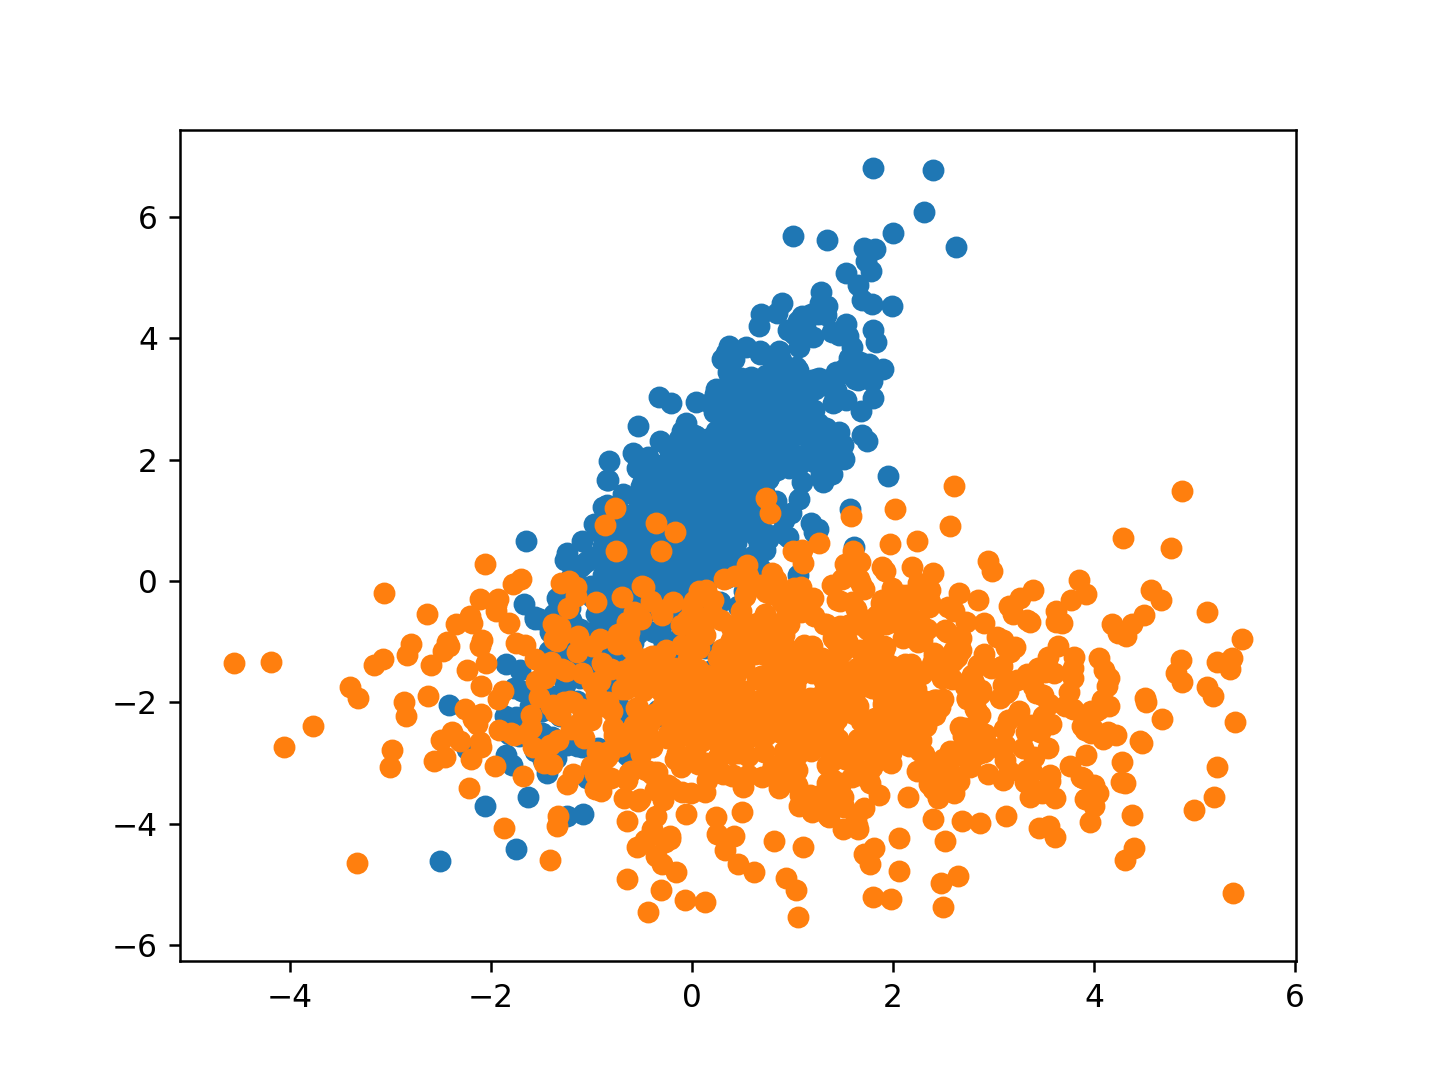

In [11]:
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

### K-Means

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', n_init=10, random_state=0)
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [13]:
centers = kmeans.cluster_centers_
predicted_labels = kmeans.labels_

<IPython.core.display.Javascript object>


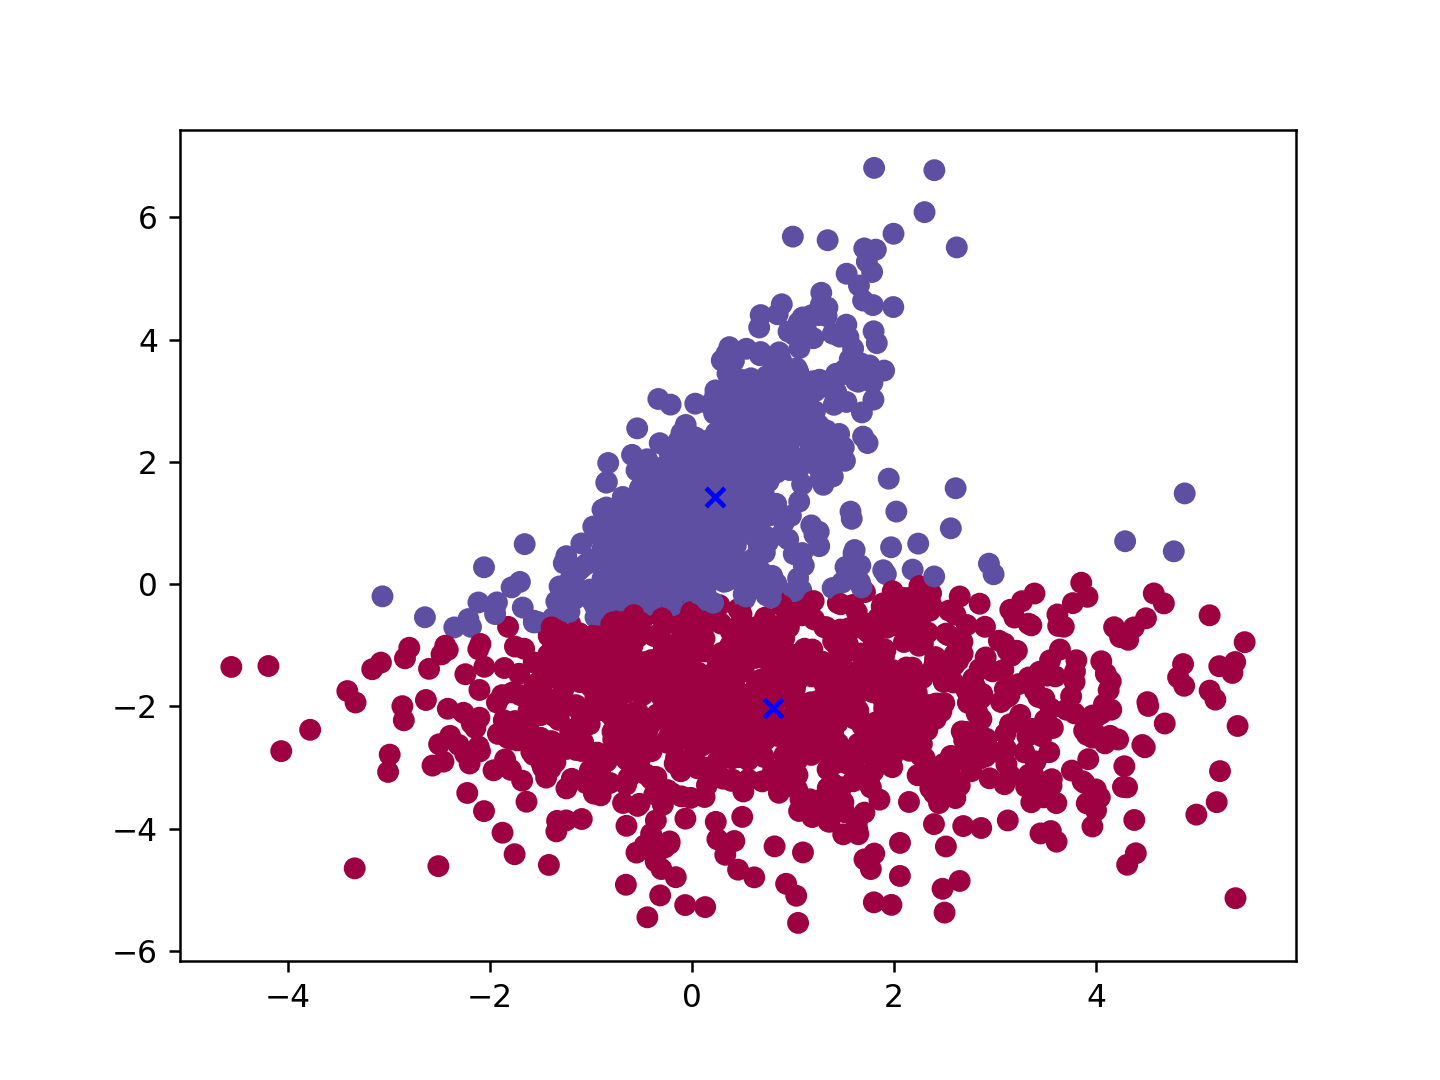

In [14]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
# plt.axis([-15, 15, -15, 15])
plt.show()

### GMM

In [15]:
gmm = GaussianMixture(n_components=2).fit(points)

In [16]:
predicted_labels = gmm.predict(points)
centers = gmm.means_

<IPython.core.display.Javascript object>


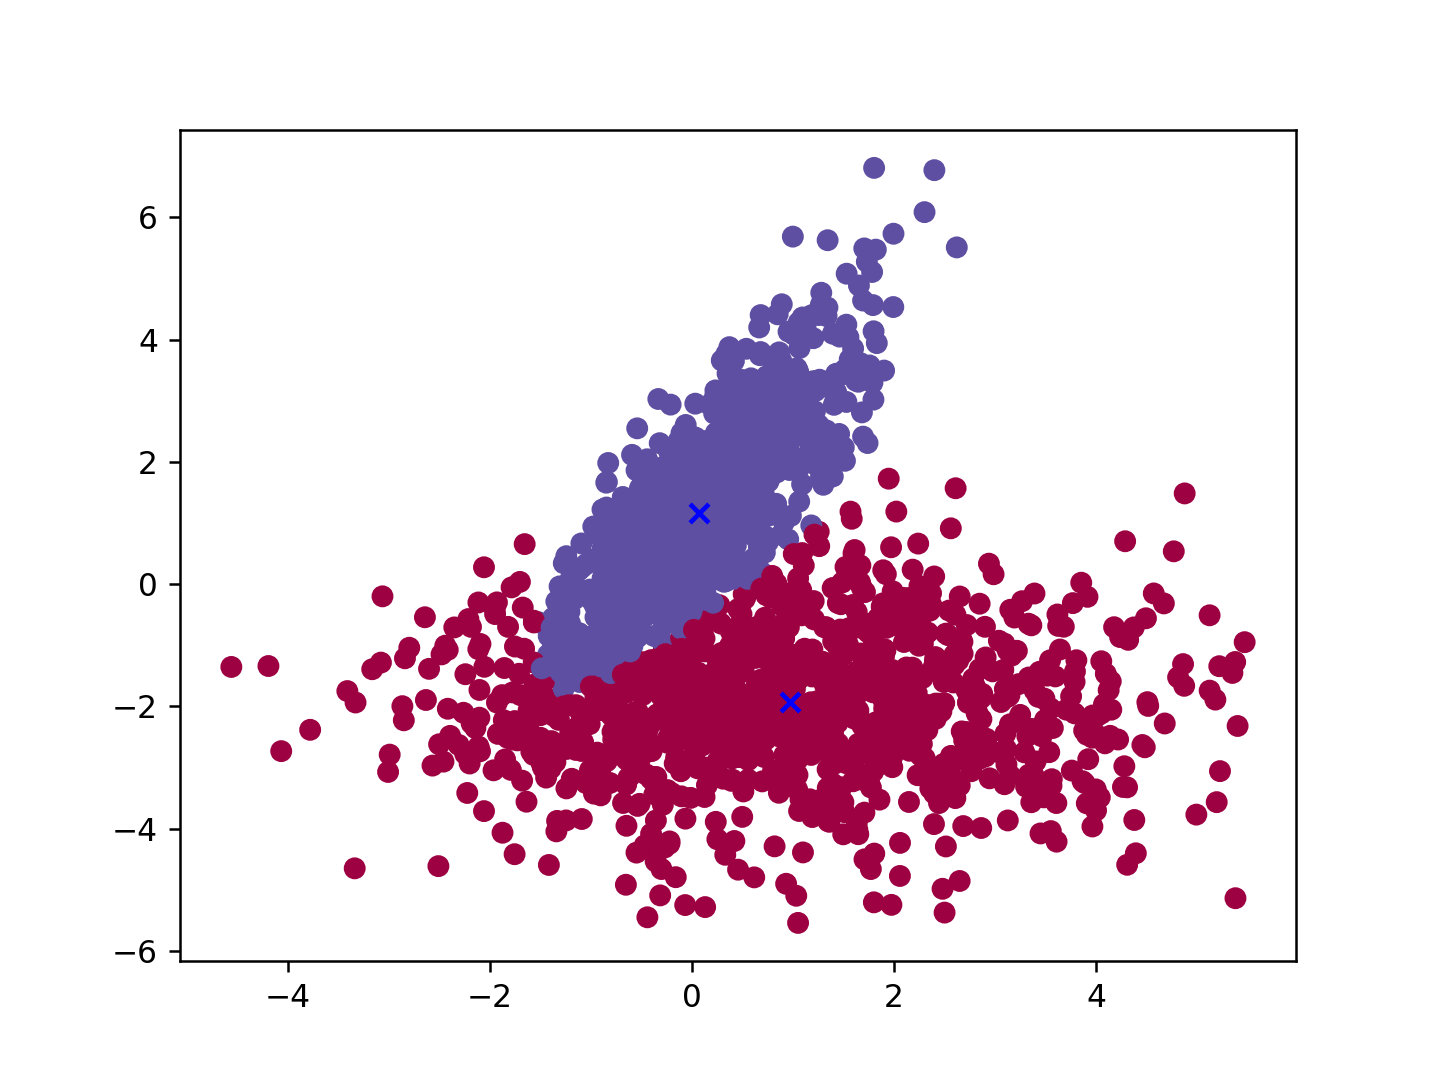

In [17]:
plt.figure()
plt.scatter(points[:,0], points[:,1], c=predicted_labels, cmap='Spectral')
plt.scatter(centers[:,0], centers[:,1], c='b', marker='x')
# plt.axis([-15, 15, -15, 15])
plt.show()

### Pros

- Due to the standard deviation parameter, the clusters can take on any ellipse shape;
- Can have multiple clusters per data point.
- Less sensitive to outliers

### Cons

- Have to select number of clusters;

#### Done!